# Introduction

If someone has an idea for a new classifier, it should compare the performance of its new classifier with the performance of standard classifiers on some standard datasets.

But what are the performances of these standard classifiers on these standard datasets?

This notebook tries to answer this question.

# TensorFlow Version check

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# MNIST

## Preparing the dataset

In [2]:
import numpy as np

def prepare_data():
    
    # 1. load MNIST dataset
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = x_train.astype(float)
    x_test  = x_test.astype(float)
    
    x_train = x_train * (1.0/255.0)
    x_test  = x_test  * (1.0/255.0)
    
    # 3. images are 2D, prepare input as 1D input for a MLP
    x_train = x_train.reshape(-1,28*28)
    x_test  = x_test.reshape(-1,28*28)
    
    # 4. map train data target labels to one-hot encoded vectors
    y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
    y_train_onehot[np.arange(y_train.size),y_train] = 1
    
    # 5. map test data target labels to one-hot encoded vectors
    y_test_onehot = np.zeros((y_test.size, y_train.max()+1))
    y_test_onehot[np.arange(y_test.size),y_test] = 1
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot

# get MNIST data now
x_train, y_train, x_test, y_test = prepare_data()

In [3]:
x_train.shape

(60000, 784)

In [4]:
y_train.shape

(60000, 10)

In [5]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [6]:
x_test.shape

(10000, 784)

In [7]:
y_test.shape

(10000, 10)

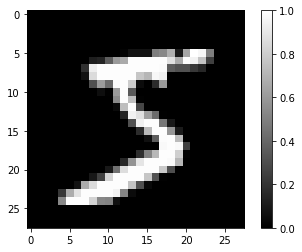

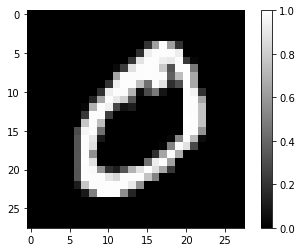

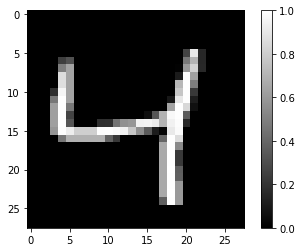

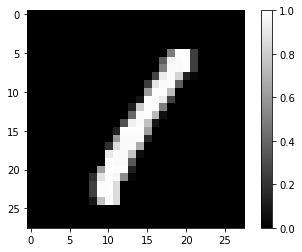

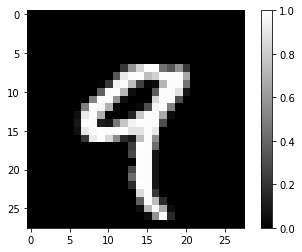

In [8]:
from matplotlib import pyplot as plt

for i in range(0,5):
    plt.imshow( x_train[i,:].reshape(28,28), cmap="gray" )
    plt.colorbar()
    plt.show()

## Model test function

In [9]:
def model_test(your_model, x_test, y_test, how_many_to_test=None):
    
    nr_test_samples = x_test.shape[0]
    
    if how_many_to_test is None:
        how_many_to_test = nr_test_samples
   
    correct = 0
    for sample_id in range(0, how_many_to_test):
        
        if sample_id % 100 == 0:
            print("tested so far {0} of {1} images".format(sample_id, how_many_to_test))

        # get next test sample
        input_vec   = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
        # note: the input to a MLP is a batch of 1D inputs, so 2D!
        pred_vec = your_model.predict( input_vec.reshape(1,-1) )        
        
        # compute predicted label
        pred_label = np.argmax( pred_vec )
        
        # get actual label
        gt_label = np.argmax( teacher_vec )
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/how_many_to_test
    return acc

## Set experiment parameters

In [10]:
PARAM_NR_TEST_IMAGES = 2000
PARAM_NR_TRAIN_EPOCHS = 50

## Perceptron

In [11]:
from tensorflow import keras

tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(10,
                             activation="linear",
                             input_shape=(nr_inputs,)))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 2000 images
tested so far 100 of 2000 images
tested so far 200 of 2000 images
tested so far 300 of 2000 images
tested so far 400 of 2000 images
tested so far 500 of 2000 images
tested so far 600 of 2000 images
tested so far 700 of 2000 images
tested so far 800 of 2000 images
tested so far 900 of 2000 images
tested so far 1000 of 2000 images
tested so far 1100 of 2000 images
tested so far 1200 of 2000 images
tested so far 1300 of 2000 images
tested so far 1400 of 2000 images
tested so far 1500 of 2000 images
tested so far 1600 of 2000 images
tested so far 1700 of 2000 images
tested so far 1800 of 2000 images
tested so far 1900 of 2000 images


0.1155

In [14]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0870 - accuracy: 0.5809 - val_loss: 0.0602 - val_accuracy: 0.7658
Epoch 2/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0581 - accuracy: 0.7629 - val_loss: 0.0515 - val_accuracy: 0.8213
Epoch 3/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0524 - accuracy: 0.7951 - val_loss: 0.0477 - val_accuracy: 0.8423
Epoch 4/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0496 - accuracy: 0.8109 - val_loss: 0.0456 - val_accuracy: 0.8525
Epoch 5/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0478 - accuracy: 0.8188 - val_loss: 0.0442 - val_accuracy: 0.8577
Epoch 6/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0465 - accuracy: 0.8260 - val_loss: 0.0431 - val_accuracy: 0.8570
Epoch 7/50
54000/54000 [==============================] -

In [15]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 2000 images
tested so far 100 of 2000 images
tested so far 200 of 2000 images
tested so far 300 of 2000 images
tested so far 400 of 2000 images
tested so far 500 of 2000 images
tested so far 600 of 2000 images
tested so far 700 of 2000 images
tested so far 800 of 2000 images
tested so far 900 of 2000 images
tested so far 1000 of 2000 images
tested so far 1100 of 2000 images
tested so far 1200 of 2000 images
tested so far 1300 of 2000 images
tested so far 1400 of 2000 images
tested so far 1500 of 2000 images
tested so far 1600 of 2000 images
tested so far 1700 of 2000 images
tested so far 1800 of 2000 images
tested so far 1900 of 2000 images


0.8175

## MLP

In [16]:
tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(200,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(50,
                             activation="relu"))
model.add(keras.layers.Dense(10,
                             activation="linear"))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 2000 images
tested so far 100 of 2000 images
tested so far 200 of 2000 images
tested so far 300 of 2000 images
tested so far 400 of 2000 images
tested so far 500 of 2000 images
tested so far 600 of 2000 images
tested so far 700 of 2000 images
tested so far 800 of 2000 images
tested so far 900 of 2000 images
tested so far 1000 of 2000 images
tested so far 1100 of 2000 images
tested so far 1200 of 2000 images
tested so far 1300 of 2000 images
tested so far 1400 of 2000 images
tested so far 1500 of 2000 images
tested so far 1600 of 2000 images
tested so far 1700 of 2000 images
tested so far 1800 of 2000 images
tested so far 1900 of 2000 images


0.06

In [18]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 12s 227us/sample - loss: 0.0711 - accuracy: 0.5781 - val_loss: 0.0518 - val_accuracy: 0.7825
Epoch 2/50
54000/54000 [==============================] - 10s 176us/sample - loss: 0.0480 - accuracy: 0.7954 - val_loss: 0.0405 - val_accuracy: 0.8673
Epoch 3/50
54000/54000 [==============================] - 9s 172us/sample - loss: 0.0402 - accuracy: 0.8471 - val_loss: 0.0348 - val_accuracy: 0.8890
Epoch 4/50
54000/54000 [==============================] - 8s 148us/sample - loss: 0.0359 - accuracy: 0.8707 - val_loss: 0.0313 - val_accuracy: 0.9057
Epoch 5/50
54000/54000 [==============================] - 9s 167us/sample - loss: 0.0329 - accuracy: 0.8843 - val_loss: 0.0289 - val_accuracy: 0.9137
Epoch 6/50
54000/54000 [==============================] - 11s 195us/sample - loss: 0.0308 - accuracy: 0.8941 - val_loss: 0.0270 - val_accuracy: 0.9200
Epoch 7/50
54000/54000 [========================

In [19]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 2000 images
tested so far 100 of 2000 images
tested so far 200 of 2000 images
tested so far 300 of 2000 images
tested so far 400 of 2000 images
tested so far 500 of 2000 images
tested so far 600 of 2000 images
tested so far 700 of 2000 images
tested so far 800 of 2000 images
tested so far 900 of 2000 images
tested so far 1000 of 2000 images
tested so far 1100 of 2000 images
tested so far 1200 of 2000 images
tested so far 1300 of 2000 images
tested so far 1400 of 2000 images
tested so far 1500 of 2000 images
tested so far 1600 of 2000 images
tested so far 1700 of 2000 images
tested so far 1800 of 2000 images
tested so far 1900 of 2000 images


0.935